## Предсказание цен на недвижимость

датафрейм - https://www.kaggle.com/datasets/shree1992/housedata

1. Сколько в наборе данных объектов и признаков? Дать описание каждому признаку,
если оно есть.
2. Сколько категориальных признаков, какие?
3. Столбец с максимальным количеством уникальных значений категориального
признака?
4. Есть ли бинарные признаки?
5. Какие числовые признаки?
6. Есть ли пропуски?
7. Сколько объектов с пропусками?
8. Столбец с максимальным количеством пропусков?
9. Есть ли на ваш взгляд выбросы, аномальные значения?
10. Столбец с максимальным средним значением после нормировки признаков через
стандартное отклонение?
11. Столбец с целевым признаком?
12. Сколько объектов попадает в тренировочную выборку при использовании
train_test_split с параметрами test_size = 0.3, random_state = 42?
13. Между какими признаками наблюдается линейная зависимость (корреляция)?
14. Сколько признаков достаточно для объяснения 90% дисперсии после применения
метода PCA?
15. Какой признак вносит наибольший вклад в первую компоненту?
16. Построить двухмерное представление данных с помощью алгоритма t-SNE. На
сколько кластеров визуально, на ваш взгляд, разделяется выборка? Объяснить
смысл кластеров.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from plotly import express as px
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df=pd.read_csv("data.csv")
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [2]:
df.info

<bound method DataFrame.info of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  c

1. В наборе данных 4600 объектов и 18 признаков.

- <i> date </i> - дата продажи квартиры. 
- <i> price </i> - цена квартиры в $.
- <i> bedrooms </i> - количество спален в квартире. 
- <i> bathrooms  </i> - количество ванных комнат в квартире. 
- <i> sqft_living  </i> - площадь дома (в квадратных футах).
- <i> sqft_lot  </i> - площадь участка (в квадратных футах).
- <i> floors </i> - общее количество этажей (уровней) в доме.
- <i> waterfront </i> - открывается ли вид на набережную.
- <i> view  </i> - количество раз, сколько дом был осмотрен.
- <i> condition </i> - насколько хорошее состояние (в целом) дома.
- <i> sqft_above </i> - площадь дома без учета подвала (в квадратных футах).
- <i> sqft_basement </i> - площадь подвала (в квадратных футах).
- <i> yr_built </i> - год постройки
- <i> yr_renovated </i> - Год, когда дом был отремонтирован.
- <i> city </i> - город.
- <i> statezip </i> - индекс штата.
- <i> country </i> - страна.


2. Категориальные признаки: <i> street, city, statezip, country </i>.

In [3]:
df.apply(lambda x: x.nunique()) # наибольшше кол-во уникальных признаков 

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

3.  <i> street </i>- столбец с максимальным количеством уникальных значений 

4. Бинарные признаки: <i> waterfront  </i>

5.Числовые признаки: <i> price</i>,<i> bathrooms, bedrooms</i>, <i> sqft_living </i>, <i> sqft_lot</i>, <i> floors</i>,
    <i> view</i>, <i> condition, yr_renovated, yr_built </i>

####                                Обработка данных 

In [5]:
# заметим, что  sqft_living = sqft_above + sqft_basement
(df['sqft_living'] == df['sqft_above'] + df['sqft_basement']).sum()

4600

In [6]:
# Оставим переменную sqft_living, а sqft_above и sqft_basement удалим
df = df.drop(columns = ['sqft_above','sqft_basement'])

In [7]:
#Заметим, что для переменной country количество уникальных значений = 1, следовательно, 
#для каждого объекта country = const, поэтому мы можем удалить данный признак 
df = df.drop(columns = "country")

In [8]:
df['date'] =  pd.to_datetime(df.date)

(df.date.dt.year == 2014).sum()

4600

In [9]:
df['last_year_of_work'] = pd.DataFrame([df['yr_built'], df['yr_renovated']]).max()

df['last_year_of_work'] = 2014 - df['last_year_of_work']

df = df.drop(columns =['yr_built','yr_renovated'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,street,city,statezip,last_year_of_work
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,18810 Densmore Ave N,Shoreline,WA 98133,9
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,709 W Blaine St,Seattle,WA 98119,93
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,26206-26214 143rd Ave SE,Kent,WA 98042,48
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,857 170th Pl NE,Bellevue,WA 98008,51
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,9105 170th Ave NE,Redmond,WA 98052,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,501 N 143rd St,Seattle,WA 98133,35
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,14855 SE 10th Pl,Bellevue,WA 98007,5
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,759 Ilwaco Pl NE,Renton,WA 98059,5
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,5148 S Creston St,Seattle,WA 98178,40


In [10]:
# Рассчитаем количество пропусков
df.isnull().sum()

date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
street               0
city                 0
statezip             0
last_year_of_work    0
dtype: int64

6, 7, 8. В данных нет пропусков

9. Построим boxplot, чтобы посмотреть если ли выбросы. plt.boxplot() использует cледующую формулу,
для построения усов графика:
> [25th-percentile - 1.5*IQR, 75th-percentile + 1.5*IQR], где IQR - межквартильный размах

границами усов становятся максимальные и минимальные значения входящие в данный промежуток

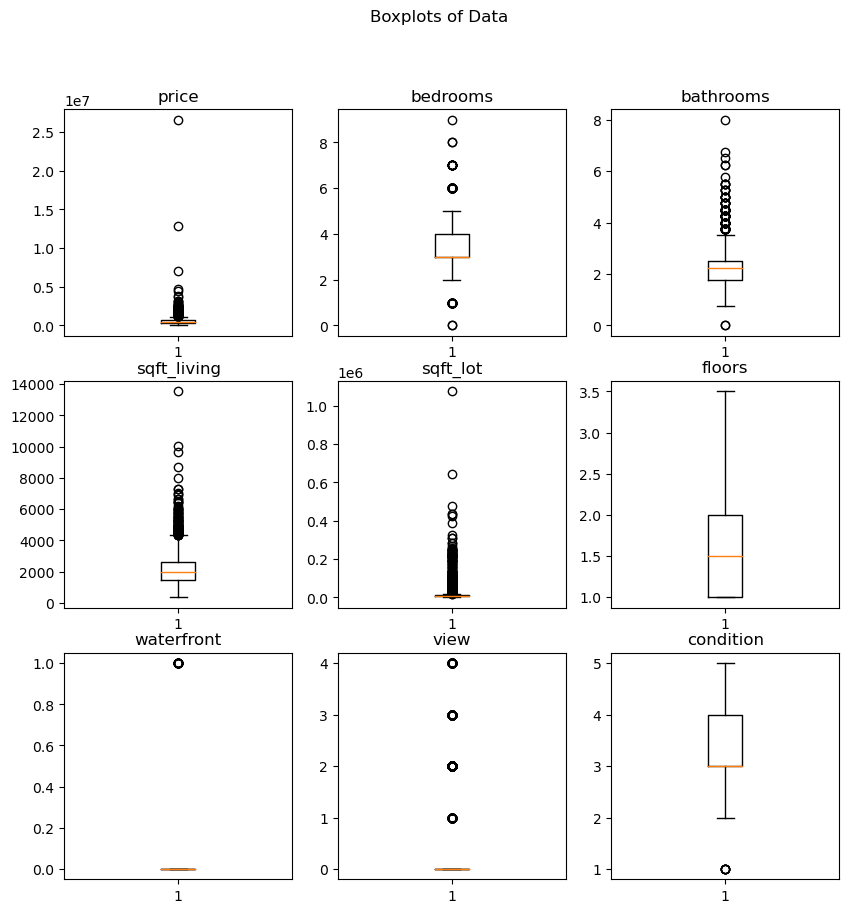

In [11]:
fig = plt.figure(figsize= (10,10))

axes = []
for i in range(1,10):
        axes.append(fig.add_subplot(3,3,i))
col = df.columns[1:11]        
fig.suptitle('Boxplots of Data')
j = 0
for i in axes:
    i.boxplot(df[col[j]])
    i.set_title(f"{col[j]}")
    j = j + 1

{'whiskers': [<matplotlib.lines.Line2D at 0x257077999d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2570779ac90>,
 'boxes': [<matplotlib.lines.Line2D at 0x257077990d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25706fbf410>],
 'fliers': [<matplotlib.lines.Line2D at 0x257072749d0>],
 'means': []}

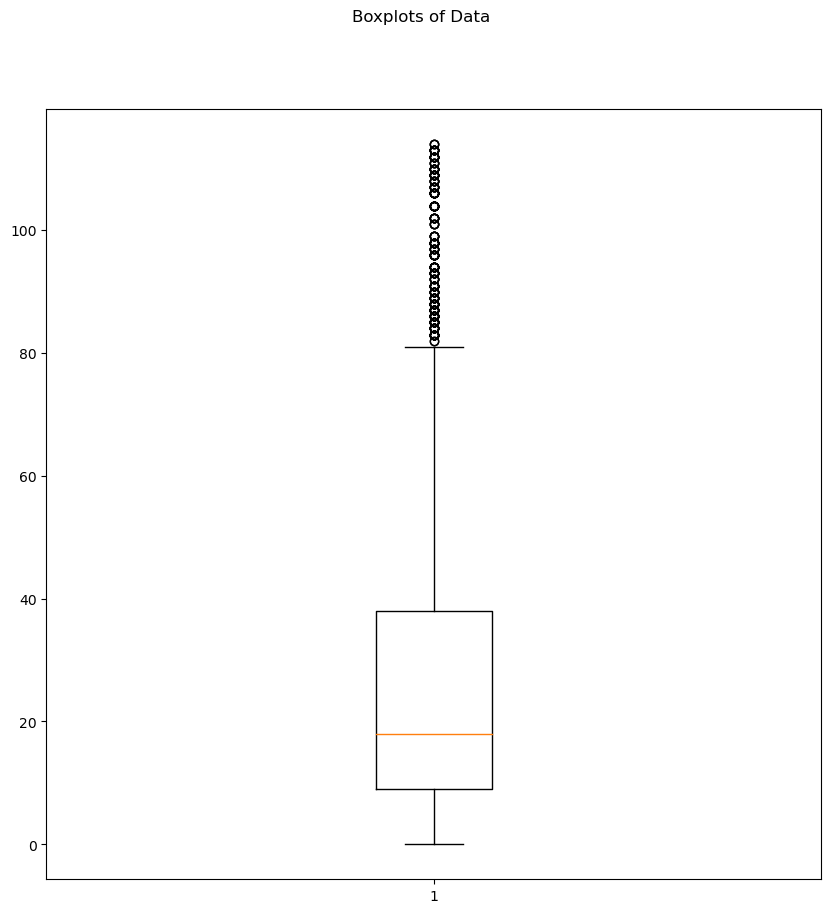

In [12]:
fig = plt.figure(figsize= (10,10))

fig.suptitle('Boxplots of Data')

ax = fig.add_subplot(1,1,1)

ax.boxplot(df['last_year_of_work'])
        

9. По графикам видно, что в данных присутствуют выбросы. 

In [13]:
# Удалим выбросы
for i in ['price', 'sqft_living', 'sqft_lot']:
    mean = df[i].mean()
    std = df[i].std()
    outliers = df[(df[i] < (mean - 3 * std)) | (df[i] > (mean + 3 * std))]
    df = df[~df[i].isin(outliers[i])]
df.reset_index(drop= True , inplace= True )

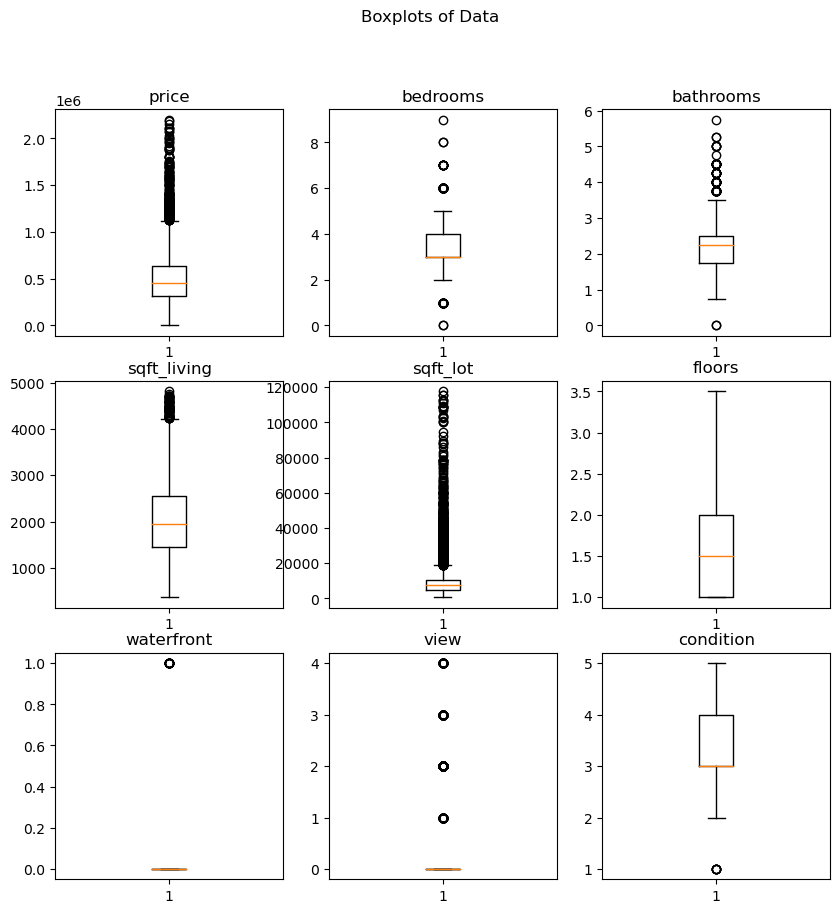

In [14]:
fig = plt.figure(figsize= (10,10))

axes = []
for i in range(1,10):
        axes.append(fig.add_subplot(3,3,i))
        
fig.suptitle('Boxplots of Data')
j = 0
for i in axes:
    i.boxplot(df[col[j]])
    i.set_title(f"{col[j]}")
    j = j + 1  
plt.savefig('my_plot_5.png')

Преобразуем переменную <i> city </i> в бинарную. Для этого найдем 10 городов, которые в среднем имеют самое дорогое жилье. Будет присваивать 1 если город относится к этому списку и 0 в противном случае.

In [15]:
top_10_cities = df.groupby("city")[["price"]].mean().sort_values("price").tail(10)
top_10_cities

,price
city,
Kirkland,6.278169e+05
Redmond,6.471323e+05
Newcastle,6.660467e+05
Sammamish,6.687431e+05
Beaux Arts Village,7.450000e+05
Bellevue,7.880357e+05
Clyde Hill,9.268222e+05
Mercer Island,9.760529e+05
Yarrow Point,1.194838e+06


In [16]:
cities = top_10_cities.index
  
df['city_2'] = 0    
    
for i in cities:
    df[f'city_{i}'] = df['city'] == i
    df['city_2'] += df[f'city_{i}']
    df = df.drop(columns = f'city_{i}')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,street,city,statezip,last_year_of_work,city_2
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,18810 Densmore Ave N,Shoreline,WA 98133,9,0
1,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,26206-26214 143rd Ave SE,Kent,WA 98042,48,0


In [17]:
df.city_2.sum()

977

Далее преобразуем переменные <i> street и statezip </i> в бинарные 

In [18]:
df.street.nunique()

4375

Переменная <i> street </i> имеет много уникальных значений. Попробуем убрать из адреса цифры, чтобы найти дома проданные на одной улице.

In [19]:
df['street_2'] = df.street.apply(lambda x : ' '.join([ i for i in x.split(' ') if i[0] not in '0123456789'] ))
df.street_2.tail(3)

4446    Ilwaco Pl NE
4447    S Creston St
4448           SE St
Name: street_2, dtype: object

In [20]:
df.street_2.nunique()

737

Количество уникальных значений стало существенно меньше. Создадим бинарную переменную, имеющую значение 1, если дом был продан на улице входящей в 100 самых дорогих.

In [21]:
top_100_streets = df.groupby('street_2')[['price']].mean().sort_values("price").tail(100)
top_100_streets

,price
street_2,
Newport Way NW,828950.0
Keystone Pl N,829500.0
NE Juanita Dr,830000.0
Private Rd,830000.0
Cascadia Ave S,832500.0
...,...
Shenandoah Dr E,1738000.0
Evergreen Point Rd,1920000.0
E Lake Sammamish Shore Ln SE,2000000.0


In [22]:
streets = top_100_streets.index
    
df_streets = df['street_2']
df['street_2'] = 0    
  
for i in streets:
    df[f'street_{i}'] = df_streets == i
    df['street_2'] += df[f"street_{i}"]
    df = df.drop(columns = f"street_{i}")
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,street,city,statezip,last_year_of_work,city_2,street_2
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,18810 Densmore Ave N,Shoreline,WA 98133,9,0,0
1,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,26206-26214 143rd Ave SE,Kent,WA 98042,48,0,0


In [23]:
df.street_2.sum()

193

Так же превратим <i> statezip </i> в бинарную переменную

In [24]:
top_5_zip = df.groupby('statezip')[['price']].mean().sort_values("price").tail(5)
top_5_zip

,price
statezip,
WA 98112,9.384970e+05
WA 98109,9.596562e+05
WA 98040,9.760529e+05
WA 98004,1.097975e+06
WA 98039,1.440500e+06


In [25]:
state = top_5_zip.index
   
df['statezip_2'] = 0    
    
for i in state:
    df[f'state_{i}'] = (df['statezip'] == i)
    df['statezip_2'] += df[f'state_{i}']
    df = df.drop(columns = f'state_{i}')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,street,city,statezip,last_year_of_work,city_2,street_2,statezip_2
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,18810 Densmore Ave N,Shoreline,WA 98133,9,0,0,0
1,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,26206-26214 143rd Ave SE,Kent,WA 98042,48,0,0,0


In [26]:
df.statezip_2.sum()

240

После обработки данных получили три новые бинарные переменные: <i> street_2, statezip_2, city_2 </i>.

In [27]:
scale_features_std = StandardScaler()

list = ['price', 'sqft_living', 'sqft_lot','last_year_of_work']
features_std = scale_features_std.fit_transform(df[list])

list2 = scale_features_std.fit_transform(df[['price']])
xm = features_std.transpose()
mean_scale =[np.mean(xm[i]) for i in range(4)]
print("10. Максимальное среднее значение",list[mean_scale.index(max(mean_scale))], max(mean_scale))


10. Максимальное среднее значение sqft_living 1.9803843388233856e-16


11. Целевой признак - price 

In [28]:
j = 0
for i in list:
    df[i] = xm[j]
    j += 1
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,street,city,statezip,last_year_of_work,city_2,street_2,statezip_2
0,2014-05-02,-0.700767,3.0,1.50,-0.882935,-0.227320,1.5,0,0,3,18810 Densmore Ave N,Shoreline,WA 98133,-0.714703,0,0,0
1,2014-05-02,-0.602149,3.0,2.00,-0.168576,0.086333,1.0,0,0,4,26206-26214 143rd Ave SE,Kent,WA 98042,0.811917,0,0,0
2,2014-05-02,-0.336901,3.0,2.25,-0.083822,-0.218147,1.0,0,0,4,857 170th Pl NE,Bellevue,WA 98008,0.929349,1,0,0
3,2014-05-02,0.105180,4.0,2.50,-0.156468,-0.026147,1.0,0,0,4,9105 170th Ave NE,Redmond,WA 98052,-0.205830,1,0,0
4,2014-05-02,-0.098857,2.0,1.00,-1.439893,-0.346407,1.0,0,0,3,522 NE 88th St,Seattle,WA 98115,-0.284118,0,0,0


In [78]:
target = df.price
train = df.drop(['price','date','city','statezip','street'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print (N_train, N_test)


3114 1335


12. 3114 объектов на обучение, 1335 на тест

<Axes: >

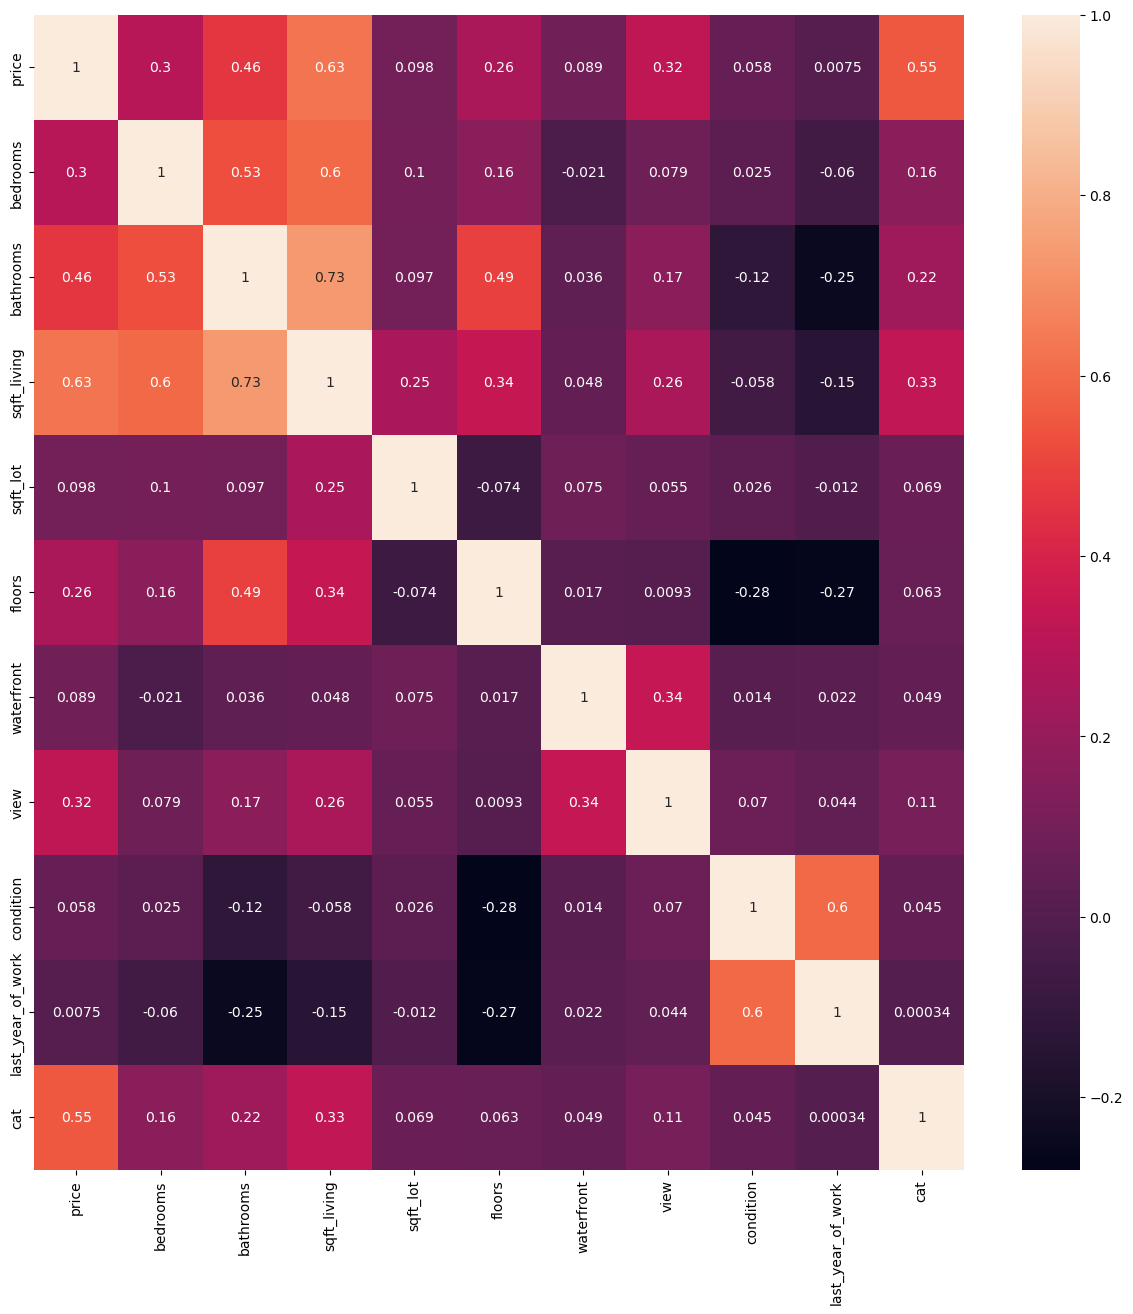

In [76]:
# Plot
plt.figure(figsize=(15,15), dpi= 100)
sns.heatmap(df.corr(numeric_only = True), annot=True)

13. Ленейнай зависимость наблюдается у признака <i> price </i> с следующими признаками:<i> bedrooms, bathrooms,sqft_living, city_2, streer_2, statezip_2 </i>. 

<i> bedrooms </i> коррелирует с <i>sqrt_living, bathrooms, floors </i>. 

<i> bathrooms </i> коррелирует с <i>sqrt_living </i>


In [79]:
pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [80]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component,train.columns)))

1 component: 33.93% of initial variance
0.474 x bedrooms + 0.431 x bathrooms + 0.641 x sqft_living + 0.187 x sqft_lot + 0.166 x floors + 0.003 x waterfront + 0.132 x view + -0.102 x condition + -0.268 x last_year_of_work + 0.129 x cat
2 component: 20.52% of initial variance
0.191 x bedrooms + -0.001 x bathrooms + 0.176 x sqft_living + 0.242 x sqft_lot + -0.135 x floors + 0.006 x waterfront + 0.151 x view + 0.435 x condition + 0.797 x last_year_of_work + 0.089 x cat
3 component: 14.87% of initial variance
-0.234 x bedrooms + -0.151 x bathrooms + -0.058 x sqft_living + 0.929 x sqft_lot + -0.116 x floors + 0.007 x waterfront + 0.015 x view + -0.090 x condition + -0.185 x last_year_of_work + -0.018 x cat
4 component: 9.19% of initial variance
-0.437 x bedrooms + 0.036 x bathrooms + 0.098 x sqft_living + -0.116 x sqft_lot + 0.037 x floors + 0.031 x waterfront + 0.876 x view + -0.025 x condition + -0.041 x last_year_of_work + 0.110 x cat
5 component: 6.5% of initial variance
0.636 x bedrooms

15. Наибольший вклад в первую компоненту вносит признак sqft_living.

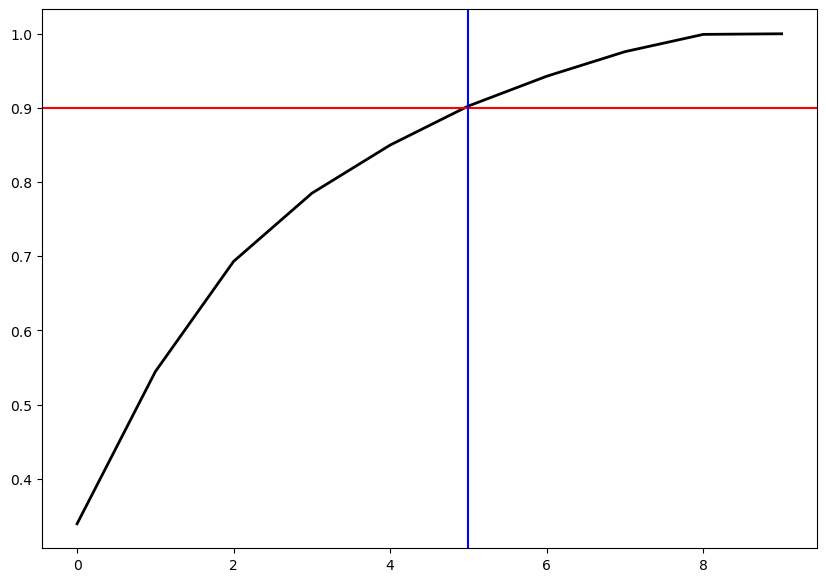

In [81]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(5, c='b')

14. Для описания 90% дисперсии данных достаточно 5-ти компонент.

In [71]:
tsne_model = TSNE(n_components=2, learning_rate='auto', random_state=0)
X_tsne = tsne_model.fit_transform(features_std)

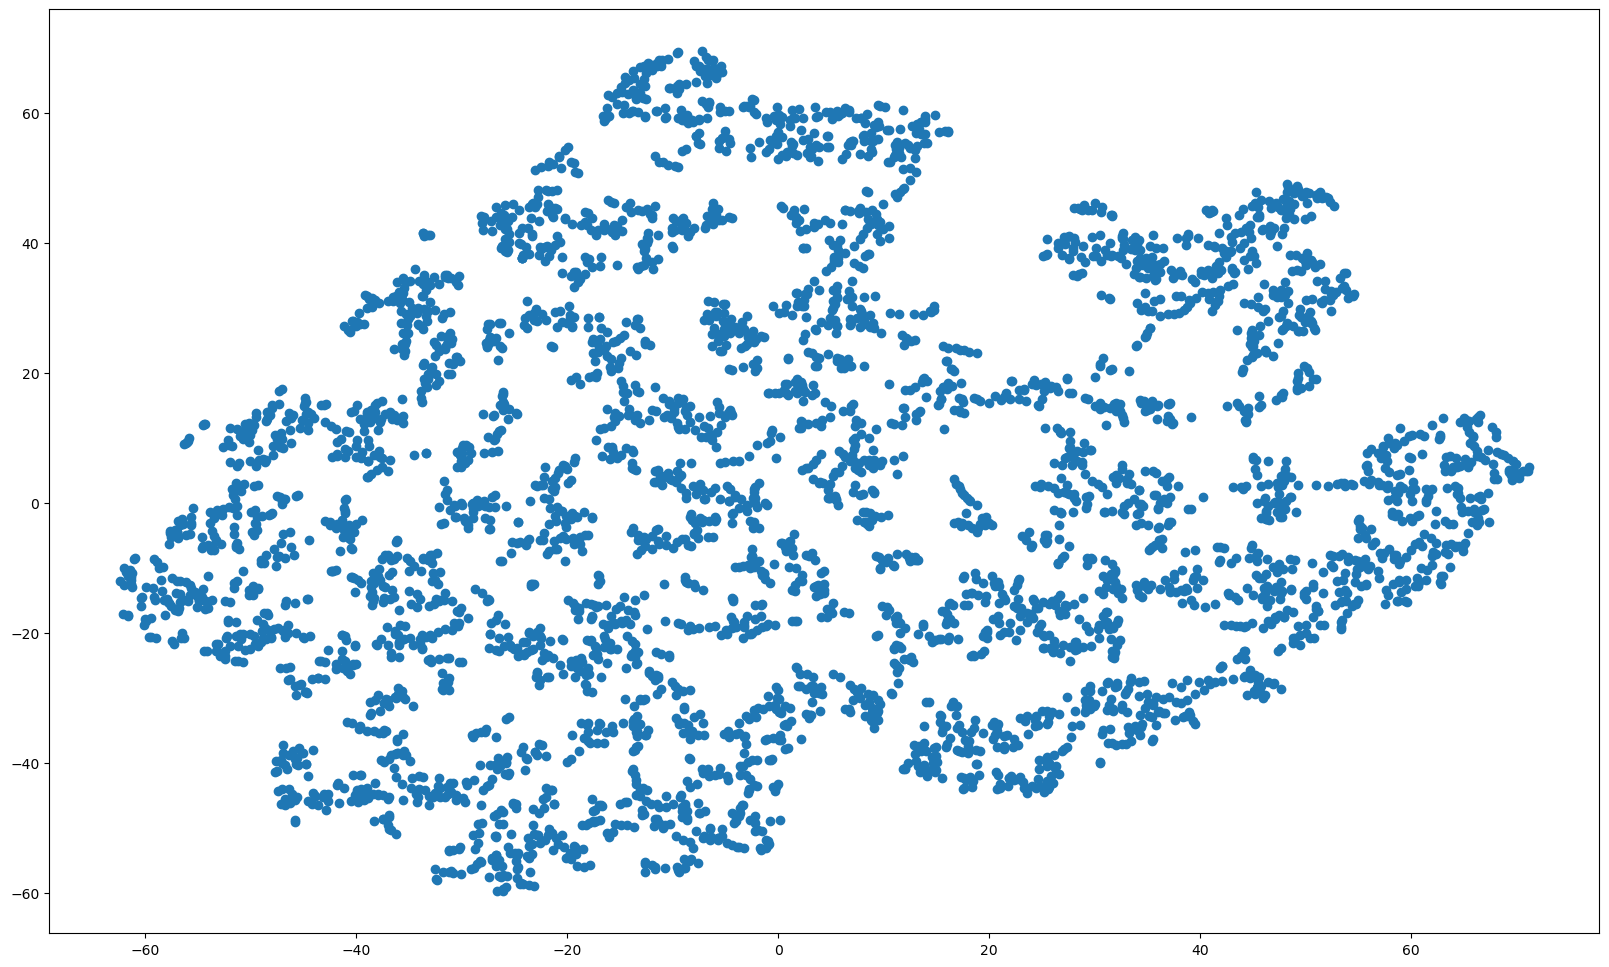

In [72]:
plt.figure(figsize=(20, 12))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [75]:
df = df.drop(columns = ['city_2', 'street_2', 'statezip_2'])

16. Визуально выборку можно разделить на 6 кластеров. Разделение выборки на кластеры, позволит построить модели для каждого класстера, а не для всего набора данный в целом, что в перспективе должно повысить точность прогнозов. 

In [36]:
data = np.array(features_std)

kmeans = KMeans(n_clusters=6, n_init = 'auto')

kmeans.fit(data)

labels = kmeans.predict(data)
data1 = []
data2 = []
for i in range(1,len(data)):
    data1.append(data[i])
    data2.append(labels[i])
data1 = np.array(data1)
data2 = np.array(data2)

In [37]:
tsne_model = TSNE(n_components=2)
X_tsne = tsne_model.fit_transform(data1)

In [40]:
X_embedded = tsne_model.fit_transform(data1)

fig = px.scatter(None, x=X_embedded[:,0], y=X_embedded[:,1], opacity=1, color=data2.astype(str))

fig.update_layout(dict(plot_bgcolor = 'white'))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
zeroline=True, zerolinewidth=1,
zerolinecolor='lightgrey',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
zeroline=True, zerolinewidth=1,
zerolinecolor='lightgrey',
showline=True, linewidth=1, linecolor='black')


fig.update_traces(marker=dict(size=4))

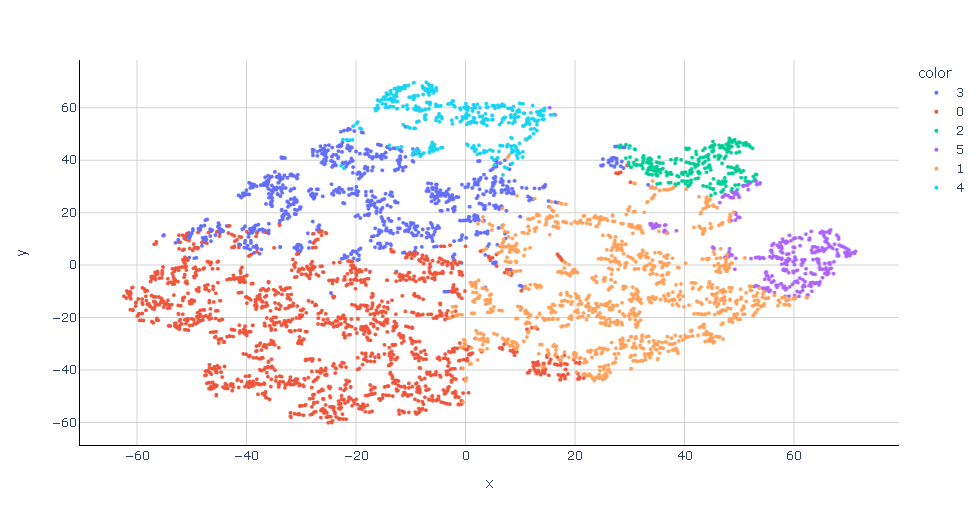

In [52]:
from PIL import Image
from IPython.display import display


image = Image.open('C:\\Users\\nikit\\Downloads\\newplot_2.png')
display(image)